## k-최근접 이웃 알고리즘
- 지도학습 알고리즘 중 하나이다.
- 굉장히 직관적이고 간단한 알고리즘이다.
- 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.
- knn의 특징은 훈련이 따로 필요 없다는 것이다. 다른 모델들은 fit(X_train, y_train)의 코드를 통해 훈련을 시킨다. 즉, 훈련데이터를 기반으로 모델을 만들고 테스트 데이터로 테스트하는 방식이지만 knn은 훈련데이터를 저장하는게 훈련의 전부이다.
- 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(Lazy model)이라고 부른다.

![knn_regression](images/knn_classifier.png)

## 필요한 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터셋 로딩

In [4]:
## 도미의 관측 데이터셋
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

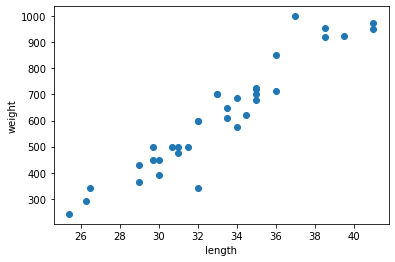

In [6]:
# feature(특성, 속성) 간의 관계를 시각화 하는 scatter plot(산점도 or 산포도)
# 길이를 x, 무게를 y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
# 빙어 관측 데이터셋
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

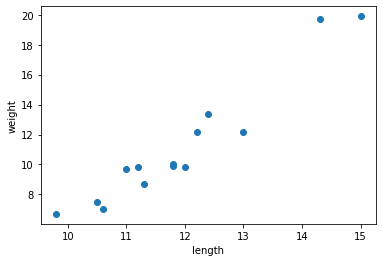

In [7]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

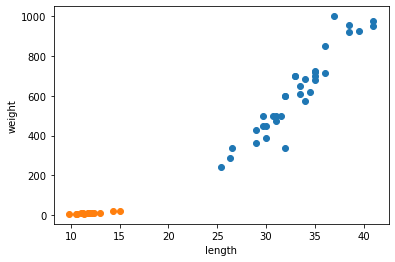

In [8]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
# 머신러닝 패키지를 사용할 경우 특성들을 2차원 Numpy 배열로 만들어줘야 한다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
# 2차원 배열을 생성하기 위해 zip()함수와 리스트내포를 사용한다.
# zip() : 나열된 리스트에서 요소를 하나씩 꺼내주는 역할을 하는 함수
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [11]:
# 도미(1), 빙어(0)
# 머신에서 찾고자 하는 것에 1을 나머지는 0으로 둔다
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### knn 알고리즘 : 2진 분류 알고리즘

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# 인스턴스 객체 생성
knn = KNeighborsClassifier()
# 훈련 - 모델에 데이터를 전달하여 규칙을 학습하는 과정을 말한다.
model = knn.fit(fish_data, fish_target)
# 평가(정확도 검사)
model.score(fish_data, fish_target)

1.0

In [13]:
# knn 학습모델
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

- KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# 예측 - 새로운 데이터를 추가하여 분류하는 작업
# 길이 - 30, 무게 600인 데이터
knn.predict([[30, 600]])

array([1])

In [ ]:
new_data = [30, 600]

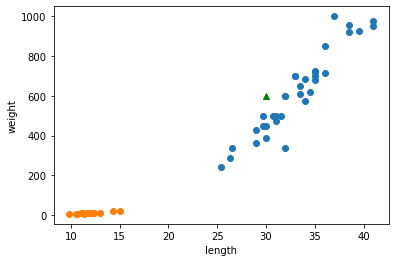

In [16]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^', color = 'g')
plt.plot()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
model._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [18]:
knn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [19]:
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [20]:
knn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [21]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [22]:
35 / 49

0.7142857142857143

## 훈련 데이터와 테스트 데이터

In [24]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [27]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [29]:
# 훈련데이터 35개, 테스트데이터 14개 분리하는 작업
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [30]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [31]:
# numpy 배열을 이용하여 데이터를 섞는작업을 수행한다.
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [32]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [34]:
input_arr.shape

(49, 2)

In [33]:
target_arr.shape

(49,)

In [35]:
# 주의할 점은 input과 target은 같은 위치에 함께 선택되어야 한다.
np.random.seed(42)
index = np.arange(49)
# shuffle()
np.random.shuffle(index)

In [36]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [37]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [38]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


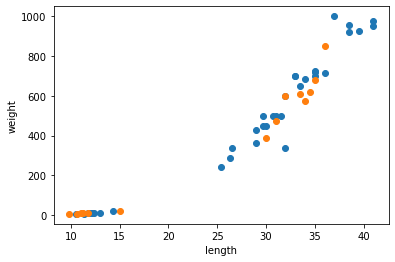

In [39]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

## 데이터 전처리(data preprocessing)

In [42]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [43]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [45]:
# column_stack()
np.column_stack([[1, 2, 3], [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [46]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [47]:
# np.zeros(), np.ones()
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, random_state=42)

In [49]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [50]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
# stratify : 클래스 비율에 맞춰서 데이터를 분리하도록 조정하는 옵션
# 훈련 데이터가 적거나 특정 클래스의 샘플 개수가 적을 때 유용하게 사용된다.
train_input, test_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, stratify = fish_target, random_state=42)

In [52]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [53]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

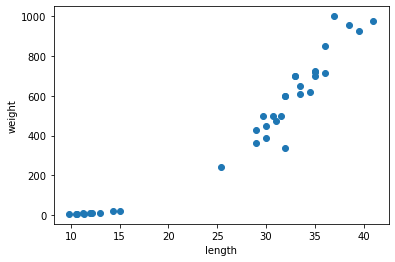

In [54]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
kn.predict([[25, 150]])

array([0.])

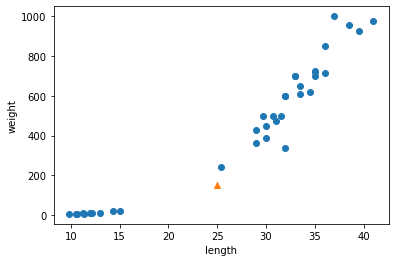

In [56]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
# kneighbors() : 이웃까지의 거리와 이웃의 샘플의 인덱스를 반환하는 함수
distances, indexs = kn.kneighbors([[25, 150]])

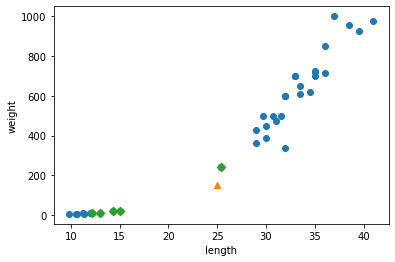

In [61]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [62]:
train_input[indexs]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [63]:
train_target[indexs]

array([[1., 0., 0., 0., 0.]])

In [64]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

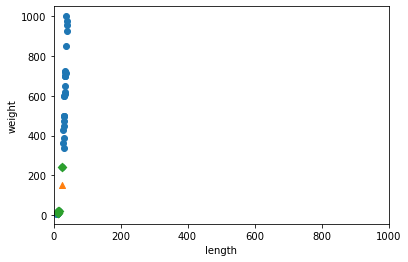

In [65]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

### 피처 스케일링
- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다
- 최소 - 최대 정규화(min-max normalization) : X<sub>new</sub> = X-min(x) / max(x) - min(x)
- z-점수 표준화(z-value standardization) : X<sub>new</sub> = X-mean(x) / std(x)

In [66]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [67]:
train_scaled = (train_input - mean) / std

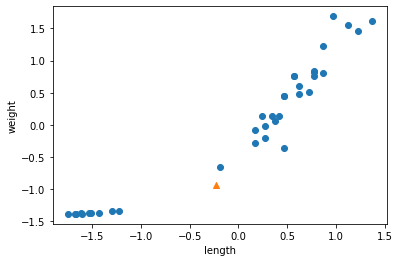

In [71]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [72]:
test_scaled = (test_input - mean) / std

In [75]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [76]:
kn.score(test_scaled, test_target)

1.0

In [77]:
kn.predict([new])

array([1.])

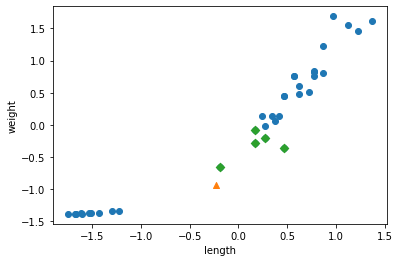

In [78]:
distances, indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 붓꽃(iris) 품종 분류 분석

### 데이터셋 로딩

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()

In [80]:
# Bunch 클래스 객체는 파이썬의 딕셔너리와 비슷하다.
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [81]:
print('iris의 키 : \n', iris.keys())

iris의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [82]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [84]:
# 데이터프레임으로 변환하여 내용 확인
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [85]:
iris['data'].shape

(150, 4)

In [86]:
iris['target'].shape

(150,)

### 훈련 데이터와 테스트 데이터 분리
- 훈련 데이터(훈련세트) : 머신러닝 모델을 만들 때 사용
- 테스트 데이터(테스트세트, 홀드아웃세트) : 모델이 얼마나 잘 작동하는지 측정하는데 사용

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [88]:
print('X_train 크기 : ', X_train.shape)
print('y_train 크기 : ', y_train.shape)

X_train 크기 :  (112, 4)
y_train 크기 :  (112,)


In [89]:
print('X_test 크기 : ', X_test.shape)
print('y_test 크기 : ', y_test.shape)

X_test 크기 :  (38, 4)
y_test 크기 :  (38,)


### 데이터 살펴보기

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

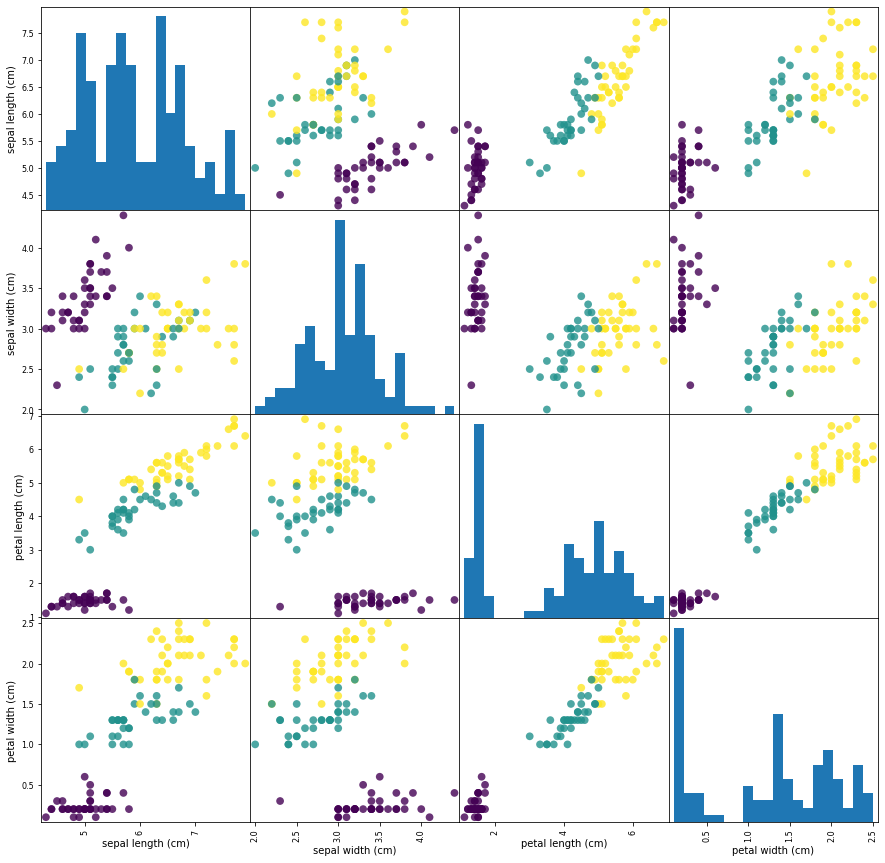

In [92]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins':20}, s = 60, alpha = .8)

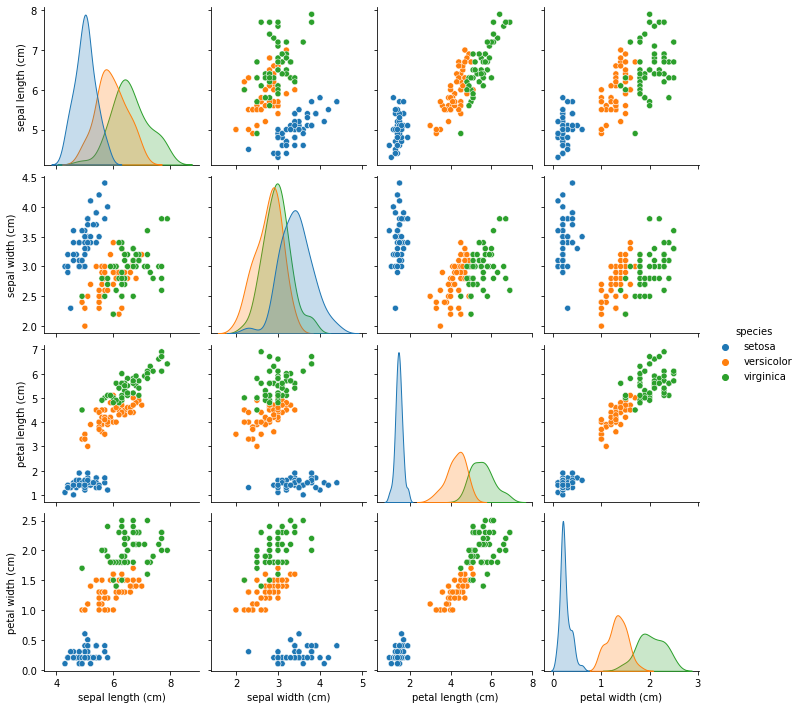

In [93]:
import seaborn as sns
sns.pairplot(df, hue = 'species')

### knn 최근접 이웃 알고리즘(단점 : 적절한 k의 선택이 필요하다)
- k가 너무 작을 때 : Overfitting(과대적합)
- k가 너무 클 때 : Underfitting(과소적합)
- 모델이 복잡할수록 훈련 데이터에 대해서는 더 정확하게 예측한다.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

In [95]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=0ac6d9854657af1428fc9d1b231c55c1e8d1e7924e665dc8fde3d0a0669d78b8
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [96]:
import mglearn

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
print('훈련세트의 정확도 : {:.2f}'.format(knn.score(X_train, y_train)))

훈련세트의 정확도 : 1.00


### 예측하기

In [100]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape : ', X_new.shape)

X_new.shape :  (1, 4)


In [101]:
prediction = knn.predict(X_new)
print('예측 : ', prediction)
print('예측한 타깃의 이름 : ', iris['target_names'][prediction])

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


### 모델 평가하기

In [102]:
y_pred = knn.predict(X_test)

In [103]:
print('테스트 데이터에 대한 예측값 : \n', y_pred)

테스트 데이터에 대한 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [104]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(X_test[i], iris['target_names'][yhat]))

[5.8 2.8 5.1 2.4] : virginica
[6.  2.2 4.  1. ] : versicolor
[5.5 4.2 1.4 0.2] : setosa
[7.3 2.9 6.3 1.8] : virginica
[5.  3.4 1.5 0.2] : setosa
[6.3 3.3 6.  2.5] : virginica
[5.  3.5 1.3 0.3] : setosa
[6.7 3.1 4.7 1.5] : versicolor
[6.8 2.8 4.8 1.4] : versicolor
[6.1 2.8 4.  1.3] : versicolor
[6.1 2.6 5.6 1.4] : virginica
[6.4 3.2 4.5 1.5] : versicolor
[6.1 2.8 4.7 1.2] : versicolor
[6.5 2.8 4.6 1.5] : versicolor
[6.1 2.9 4.7 1.4] : versicolor
[4.9 3.6 1.4 0.1] : setosa
[6.  2.9 4.5 1.5] : versicolor
[5.5 2.6 4.4 1.2] : versicolor
[4.8 3.  1.4 0.3] : setosa
[5.4 3.9 1.3 0.4] : setosa
[5.6 2.8 4.9 2. ] : virginica
[5.6 3.  4.5 1.5] : versicolor
[4.8 3.4 1.9 0.2] : setosa
[4.4 2.9 1.4 0.2] : setosa
[6.2 2.8 4.8 1.8] : virginica
[4.6 3.6 1.  0.2] : setosa
[5.1 3.8 1.9 0.4] : setosa
[6.2 2.9 4.3 1.3] : versicolor
[5.  2.3 3.3 1. ] : versicolor
[5.  3.4 1.6 0.4] : setosa
[6.4 3.1 5.5 1.8] : virginica
[5.4 3.  4.5 1.5] : versicolor
[5.2 3.5 1.5 0.2] : setosa
[6.1 3.  4.9 1.8] : virginica
[6

In [106]:
print('테스트 데이터의 정확도 : {:.2f}'.format(knn.score(X_test, y_test)))

테스트 데이터의 정확도 : 0.97


In [107]:
print('테스트 데이터의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 데이터의 정확도 : 0.97


- 사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다.
  1. confusion_matrix(y_true, y_pred)
  2. accuracy_score(y_true, y_pred)
  3. precision_score(y_true, y_pred)
  4. recall_score(y_true, y_pred)
  5. fbeta_score(y_true, y_pred, beta)
  6. f1_score(y_true, y_pred)
  7. classfication_report(y_true, y_pred)
  8. roc_curve
  9. auc

### 최적의 k값 찾기

In [108]:
from sklearn.metrics import accuracy_score

# 1 ~ 100

ks = 100
mean_acc = np.zeros((ks-1))

for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
    
print(mean_acc)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842
 0.94736842 0.94736842 0.94736842 0.92105263 0.89473684 0.94736842
 0.94736842 0.97368421 0.92105263 0.94736842 0.92105263 0.94736842
 0.92105263 0.92105263 0.92105263 0.86842105 0.89473684 0.86842105
 0.86842105 0.89473684 0.89473684 0.89473684 0.89473684 0.86842105
 0.89473684 0.89473684 0.89473684 0.86842105 0.92105263 0.89473684
 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.89473684 0.89473684 0.81578947 0.81578947 0.81578947 0.84210526
 0.84210526 0.84210526 0.71052632 0.68421053 0.65789474 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.60526316 0.60526316 0.60526316 0.60526316 0.60526316 0.6052

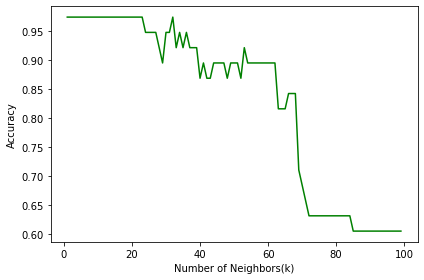

In [110]:
# 시각화
plt.plot(range(1, ks), mean_acc, 'g')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

## 와인 데이터
- 와인의 화학 성분을 사용하여 와인의 종류를 예측하기 위한 데이터세

In [111]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 유방암 진단 데이터
- 유방암(breast cancer) 진단 데이터 세트
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특정값을 사용하여 종양이 양성(bengin)인지 악성(malignant)인지를 판별하는 예제

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()